<a href="https://colab.research.google.com/github/DiegoSReco/Impact-Evaluation-techniques-in-practice/blob/main/Notas_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Notas: Variables Instrumentales**


Estas notas pertenecen al libro [The Effect](https://theeffectbook.net/) de [Nick C. Huntington-Klein](https://nickchk.com/)


In [18]:
library(tidyverse)
library(extrafont)
library(ggpubr)
library(cowplot)
library(fixest)
library(modelsummary)


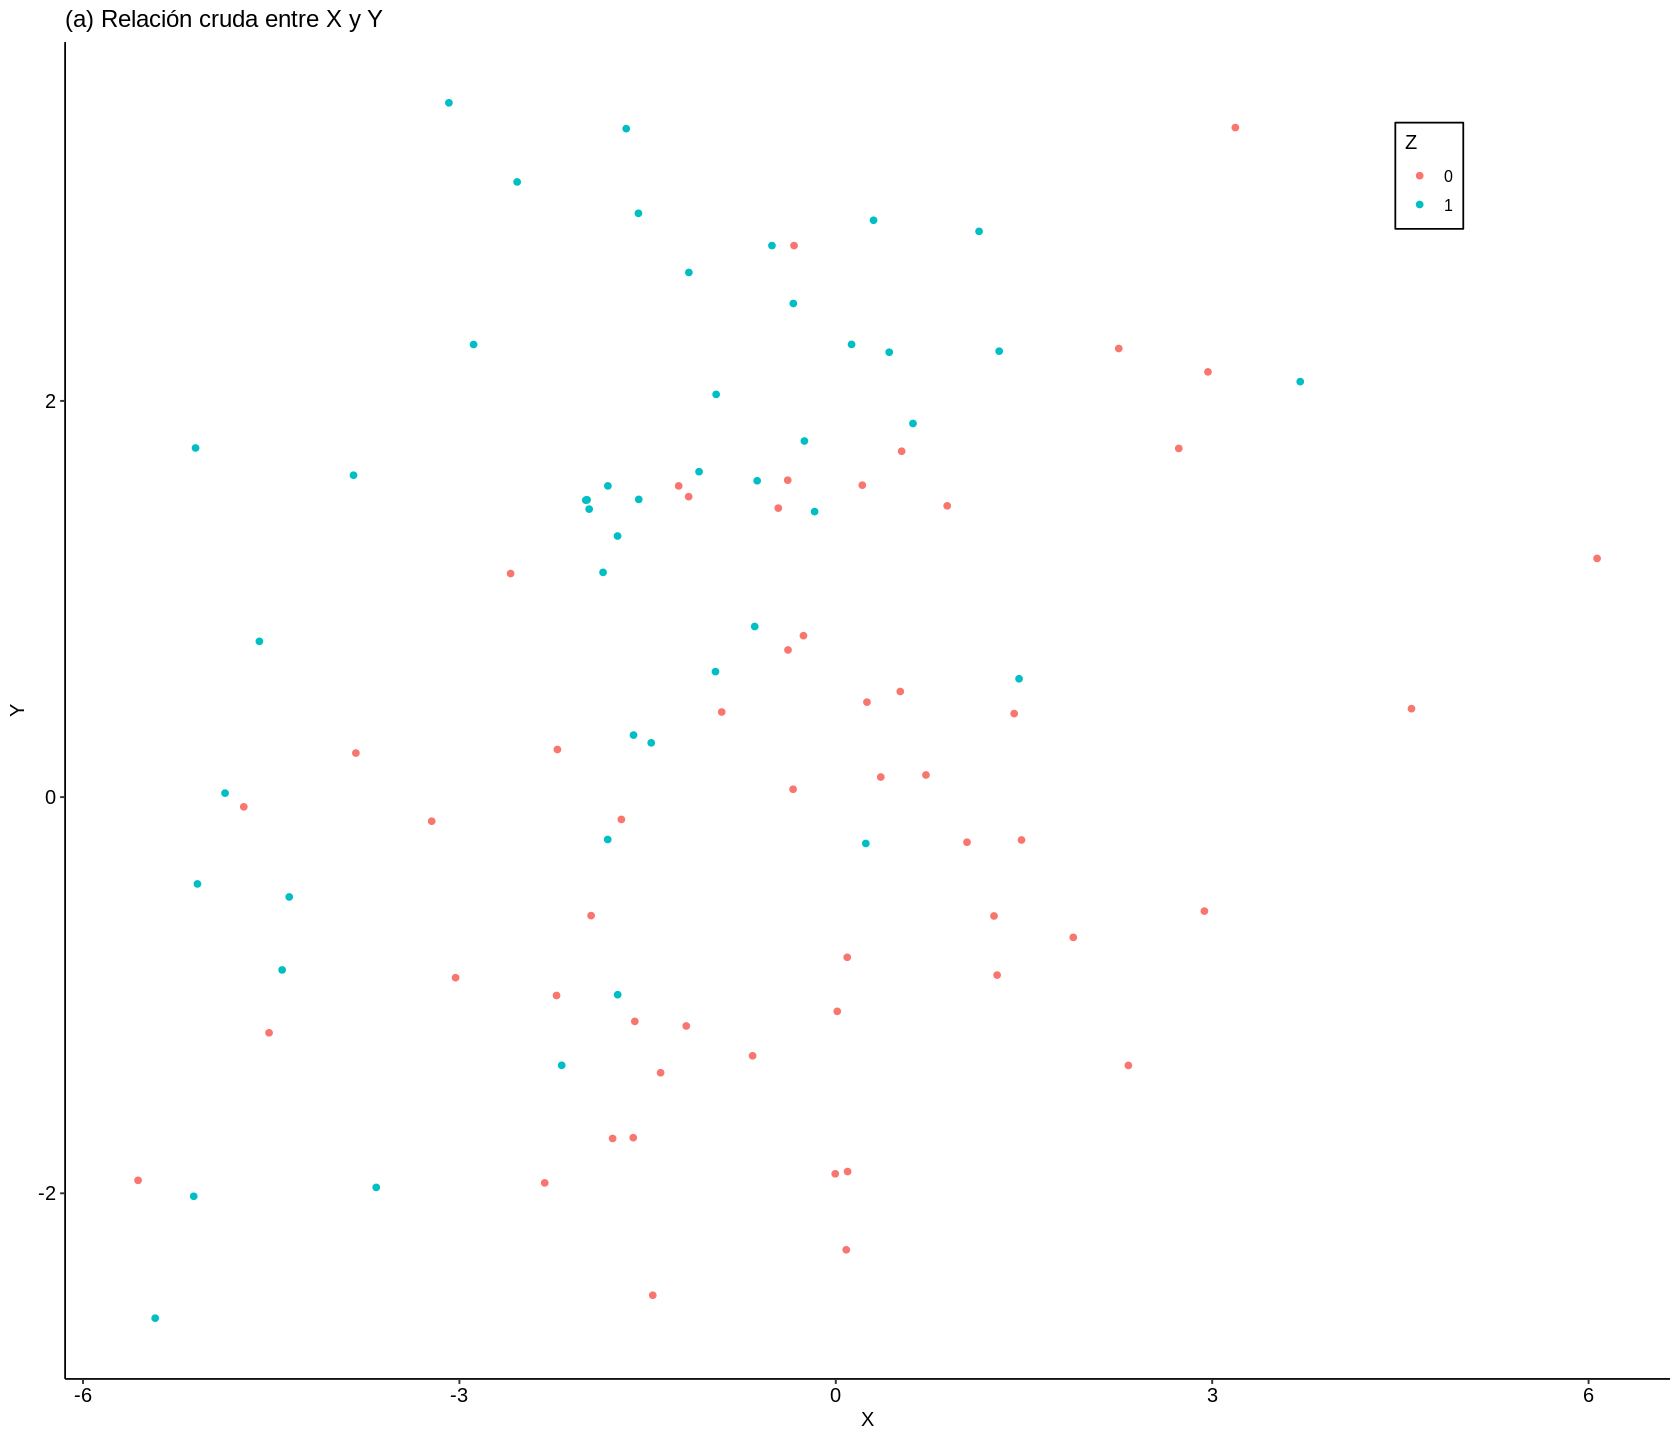

In [83]:
#Establecemos semilla para que sea reproducible
set.seed(1000)

tb <- tibble(W = rnorm(100), Z = sample(0:1, 100, replace = TRUE)) %>%
  mutate(X = 2*W - 2*Z + rnorm(100)) %>%
  mutate(Y = 2*W - .5*X + rnorm(100)) %>%
  group_by(Z) %>%
  mutate(mean_X = mean(X),
         mean_Y = mean(Y))
mns <- tb %>%
      group_by(Z) %>%
      summarize(X = mean(X), Y = mean(Y))

p1 <- ggplot(tb, aes(x = X, y = Y,  color =  factor(Z))) +
  geom_point() +
  scale_shape_manual(values = c(1,19)) +
  labs(color = 'Z',
       title = '(a) Relación cruda entre X y Y ') +
  theme_pubr() +
  theme(
        legend.position = c(.85,.9),
        legend.background = element_rect(size = .5, color = 'black'))
p1

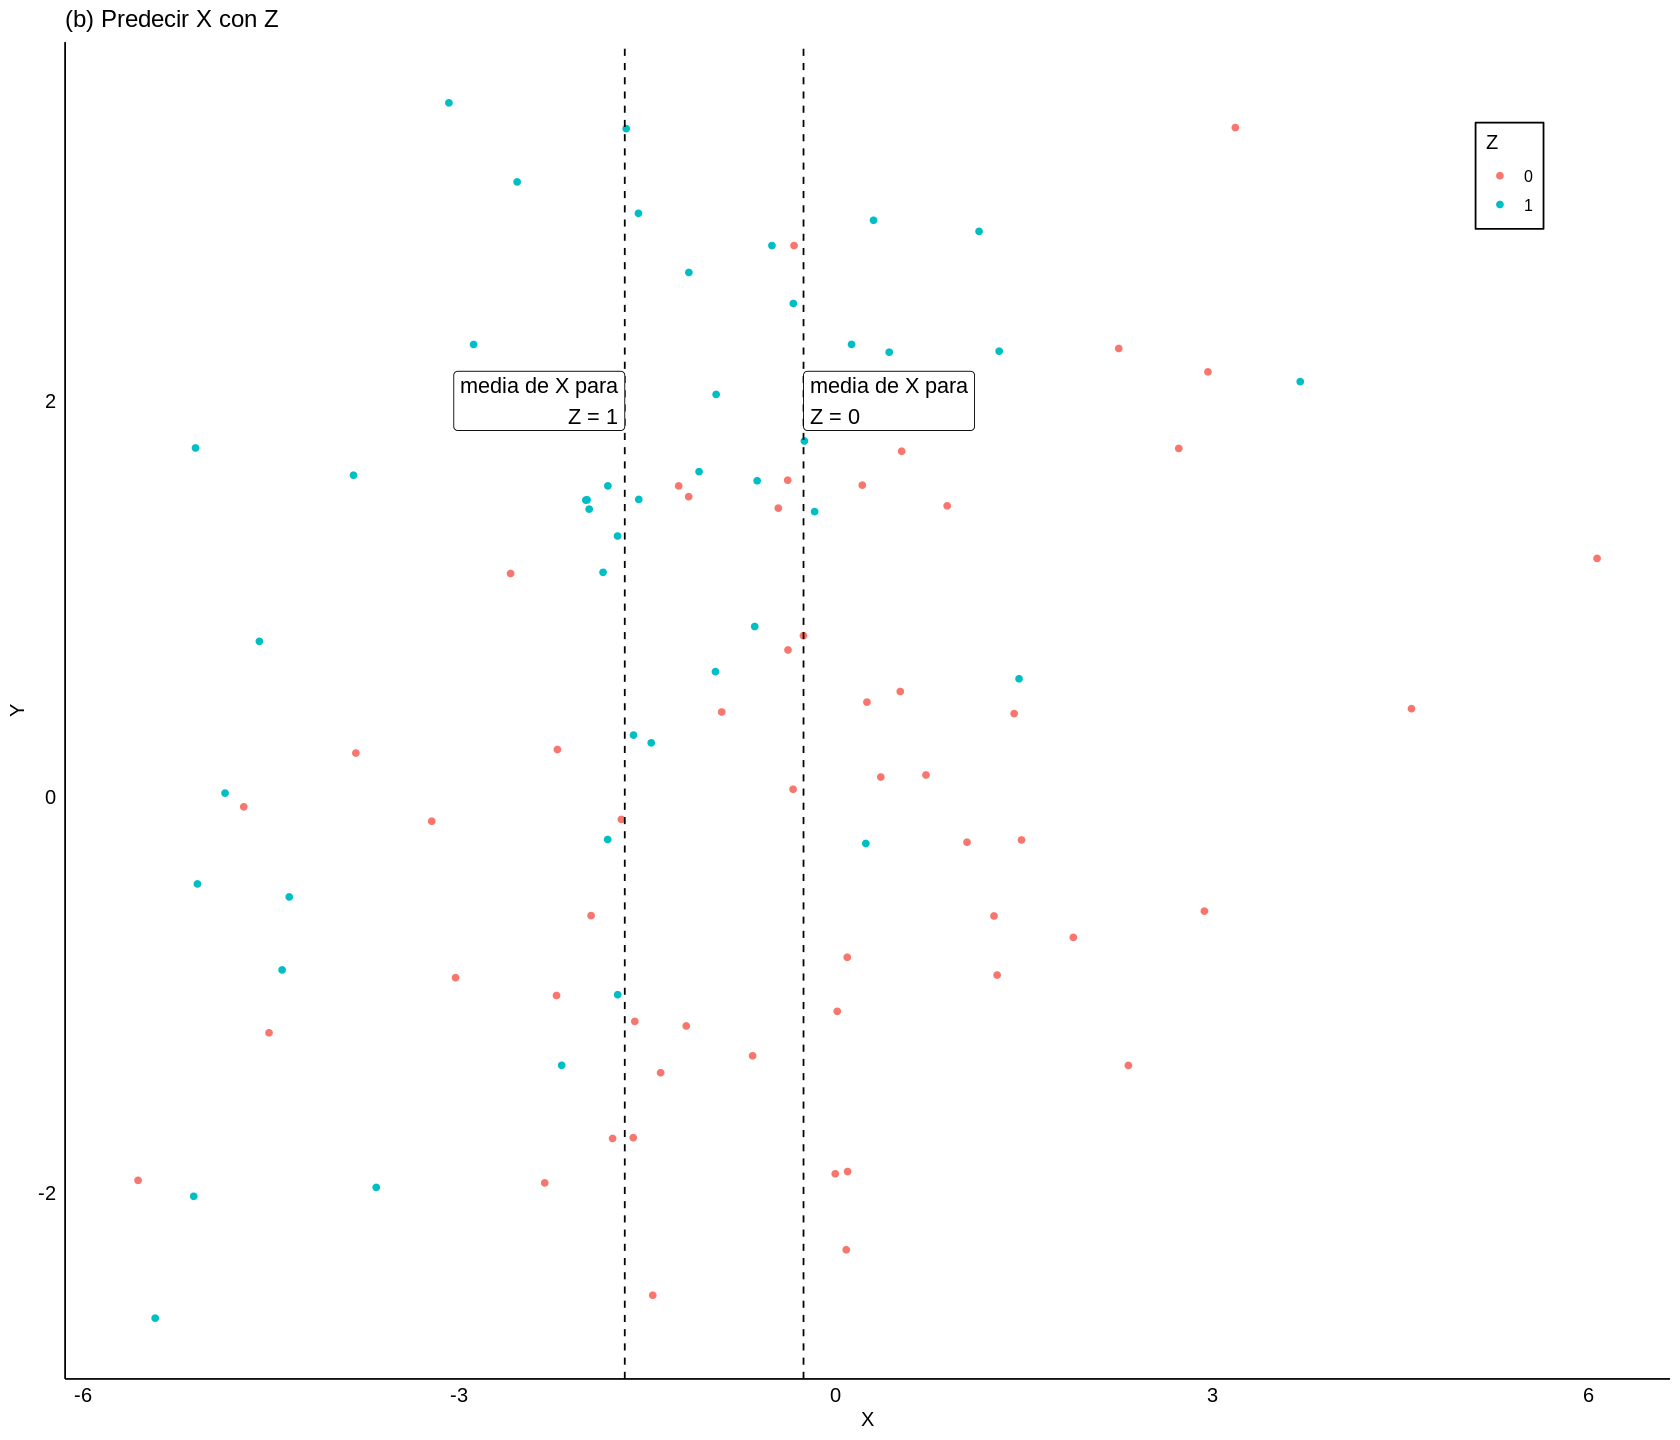

In [84]:
p2 <- ggplot(tb, aes(x = X, y = Y, color = factor(Z))) +
  geom_point() +
  geom_vline(aes(xintercept = mns$X[1]), linetype = 'dashed', color = 'black') +
  geom_vline(aes(xintercept = mns$X[2]), linetype = 'dashed', color = 'black') +
  annotate(geom = 'label', x = mns$X[1], y = 2, label = 'media de X para\nZ = 0',
            size = 13/.pt, hjust = 0) +
  annotate(geom = 'label', x = mns$X[2], y = 2, label = 'media de X para\nZ = 1',
            size = 13/.pt, hjust = 1) +
  scale_shape_manual(values = c(1,19)) +
  guides(shape = FALSE) +
  labs(title = '(b) Predecir X con Z', color = 'Z',) +
  theme_pubr() +
  theme(
        axis.ticks = element_blank(),
        legend.position = c(.9,.9),
        legend.background = element_rect(size = .5, color = 'black'))
  p2

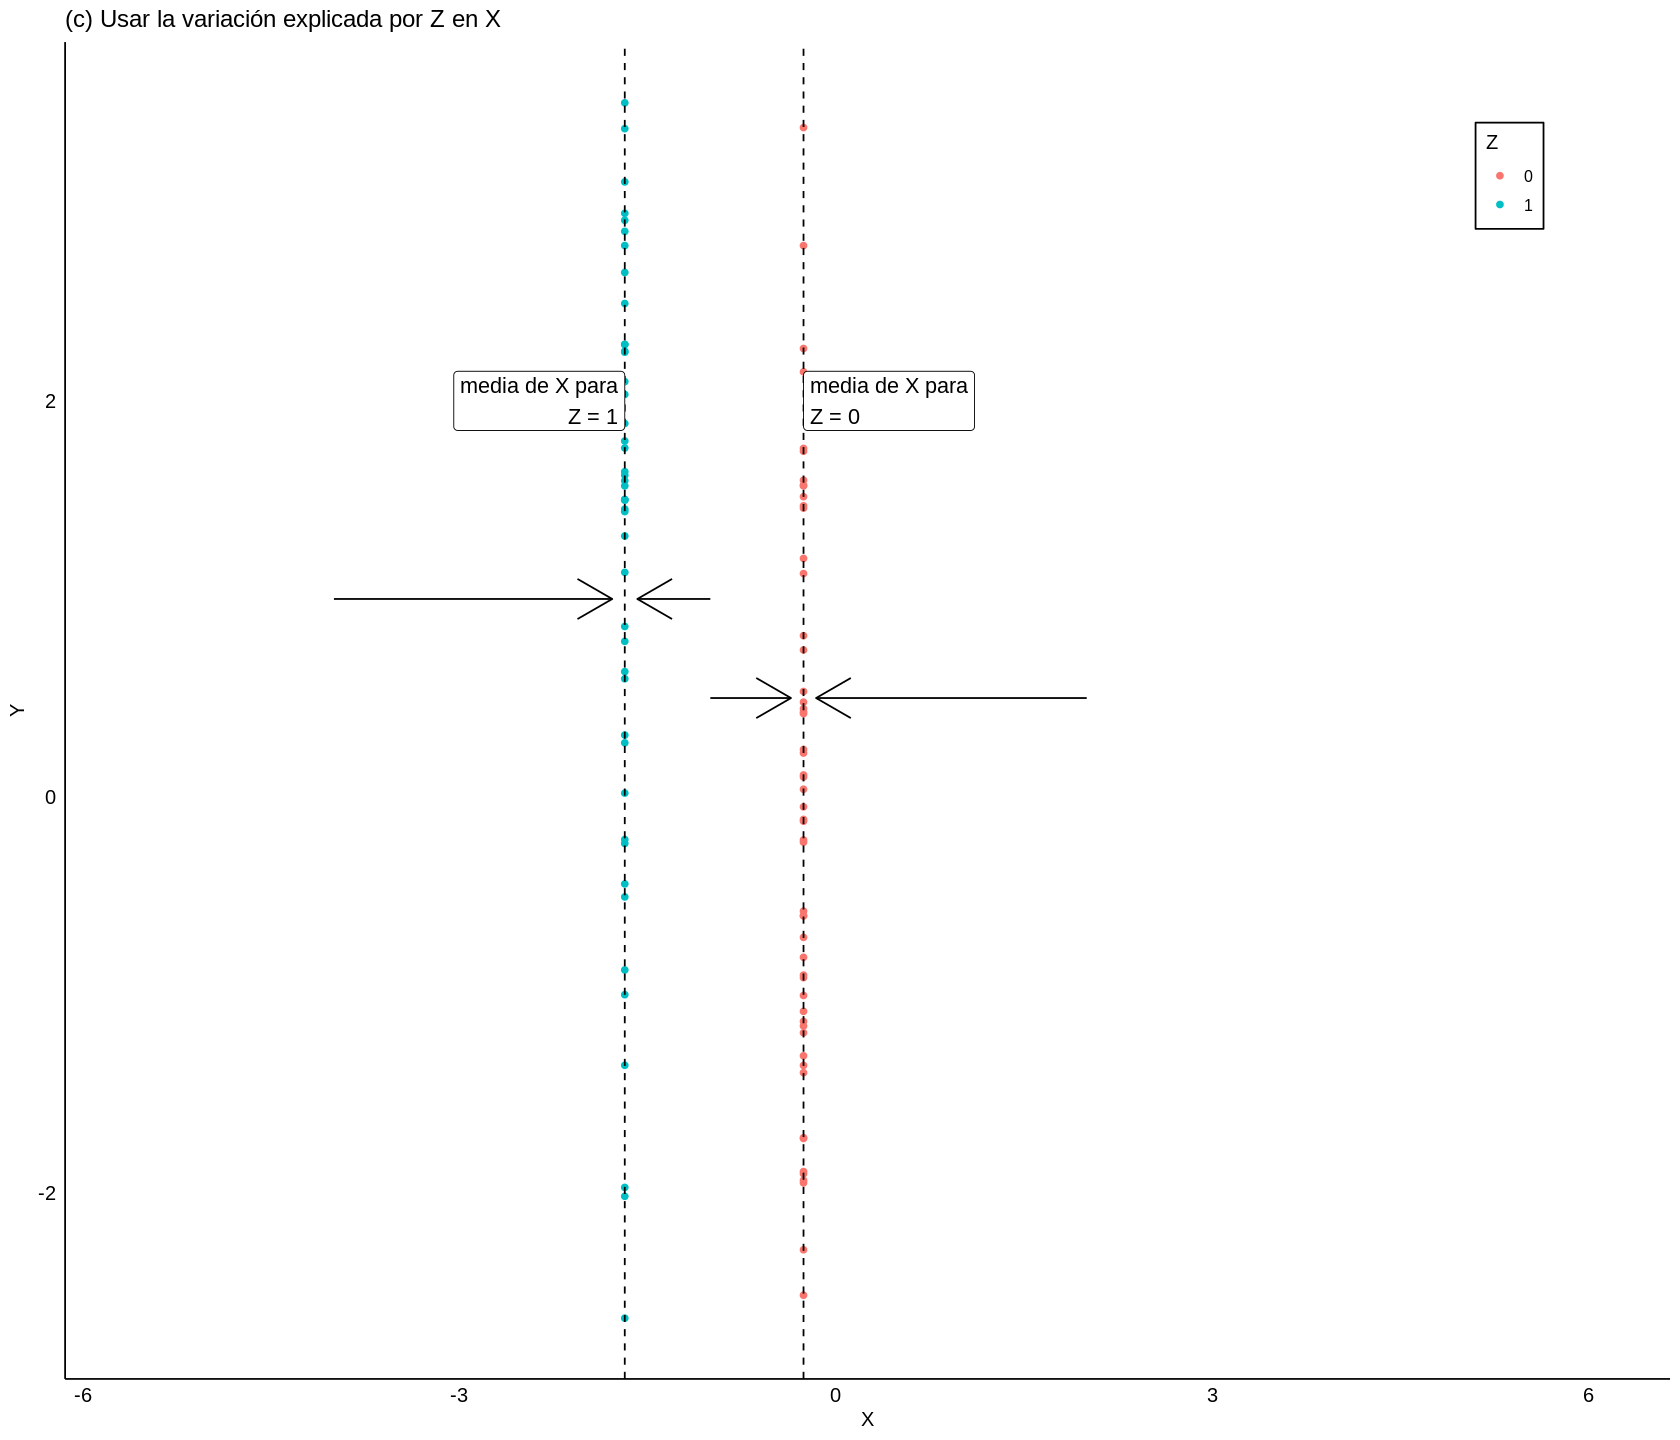

In [85]:
p3 <- ggplot(tb, aes(x = mean_X, y = Y, color= factor(Z))) +
  geom_point() +
  geom_vline(aes(xintercept = mns$X[1]), linetype = 'dashed', color = 'black') +
  geom_vline(aes(xintercept = mns$X[2]), linetype = 'dashed', color = 'black') +
  annotate(geom = 'label', x = mns$X[1], y = 2, label =  'media de X para\nZ = 0',
            size = 13/.pt, hjust = 0) +
  annotate(geom = 'label', x = mns$X[2], y = 2, label =  'media de X para\nZ = 1',
            size = 13/.pt, hjust = 1) +
  annotate(geom = 'segment', x = -4, xend = mns$X[2]-.1, y = 1, yend = 1, arrow = arrow(length = unit(0.03, "npc"))) +
  annotate(geom = 'segment', x = -1, xend = mns$X[2]+.1, y = 1, yend = 1, arrow = arrow(length = unit(0.03, "npc"))) +
  annotate(geom = 'segment', x = -1, xend = mns$X[1]-.1, y = .5, yend = .5, arrow = arrow(length = unit(0.03, "npc"))) +
  annotate(geom = 'segment', x = 2, xend = mns$X[1]+.1, y = .5, yend = .5, arrow = arrow(length = unit(0.03, "npc"))) +
  scale_shape_manual(values = c(1,19)) +
  scale_x_continuous(limits = c(min(tb$X),max(tb$X))) +
  guides(shape = FALSE) +
  labs(title = '(c) Usar la variación explicada por Z en X ', color = 'Z',
       x = 'X') +
  theme_pubr() +
  theme(
        axis.ticks = element_blank(),
        legend.position = c(.9,.9),
        legend.background = element_rect(size = .5, color = 'black'))
p3


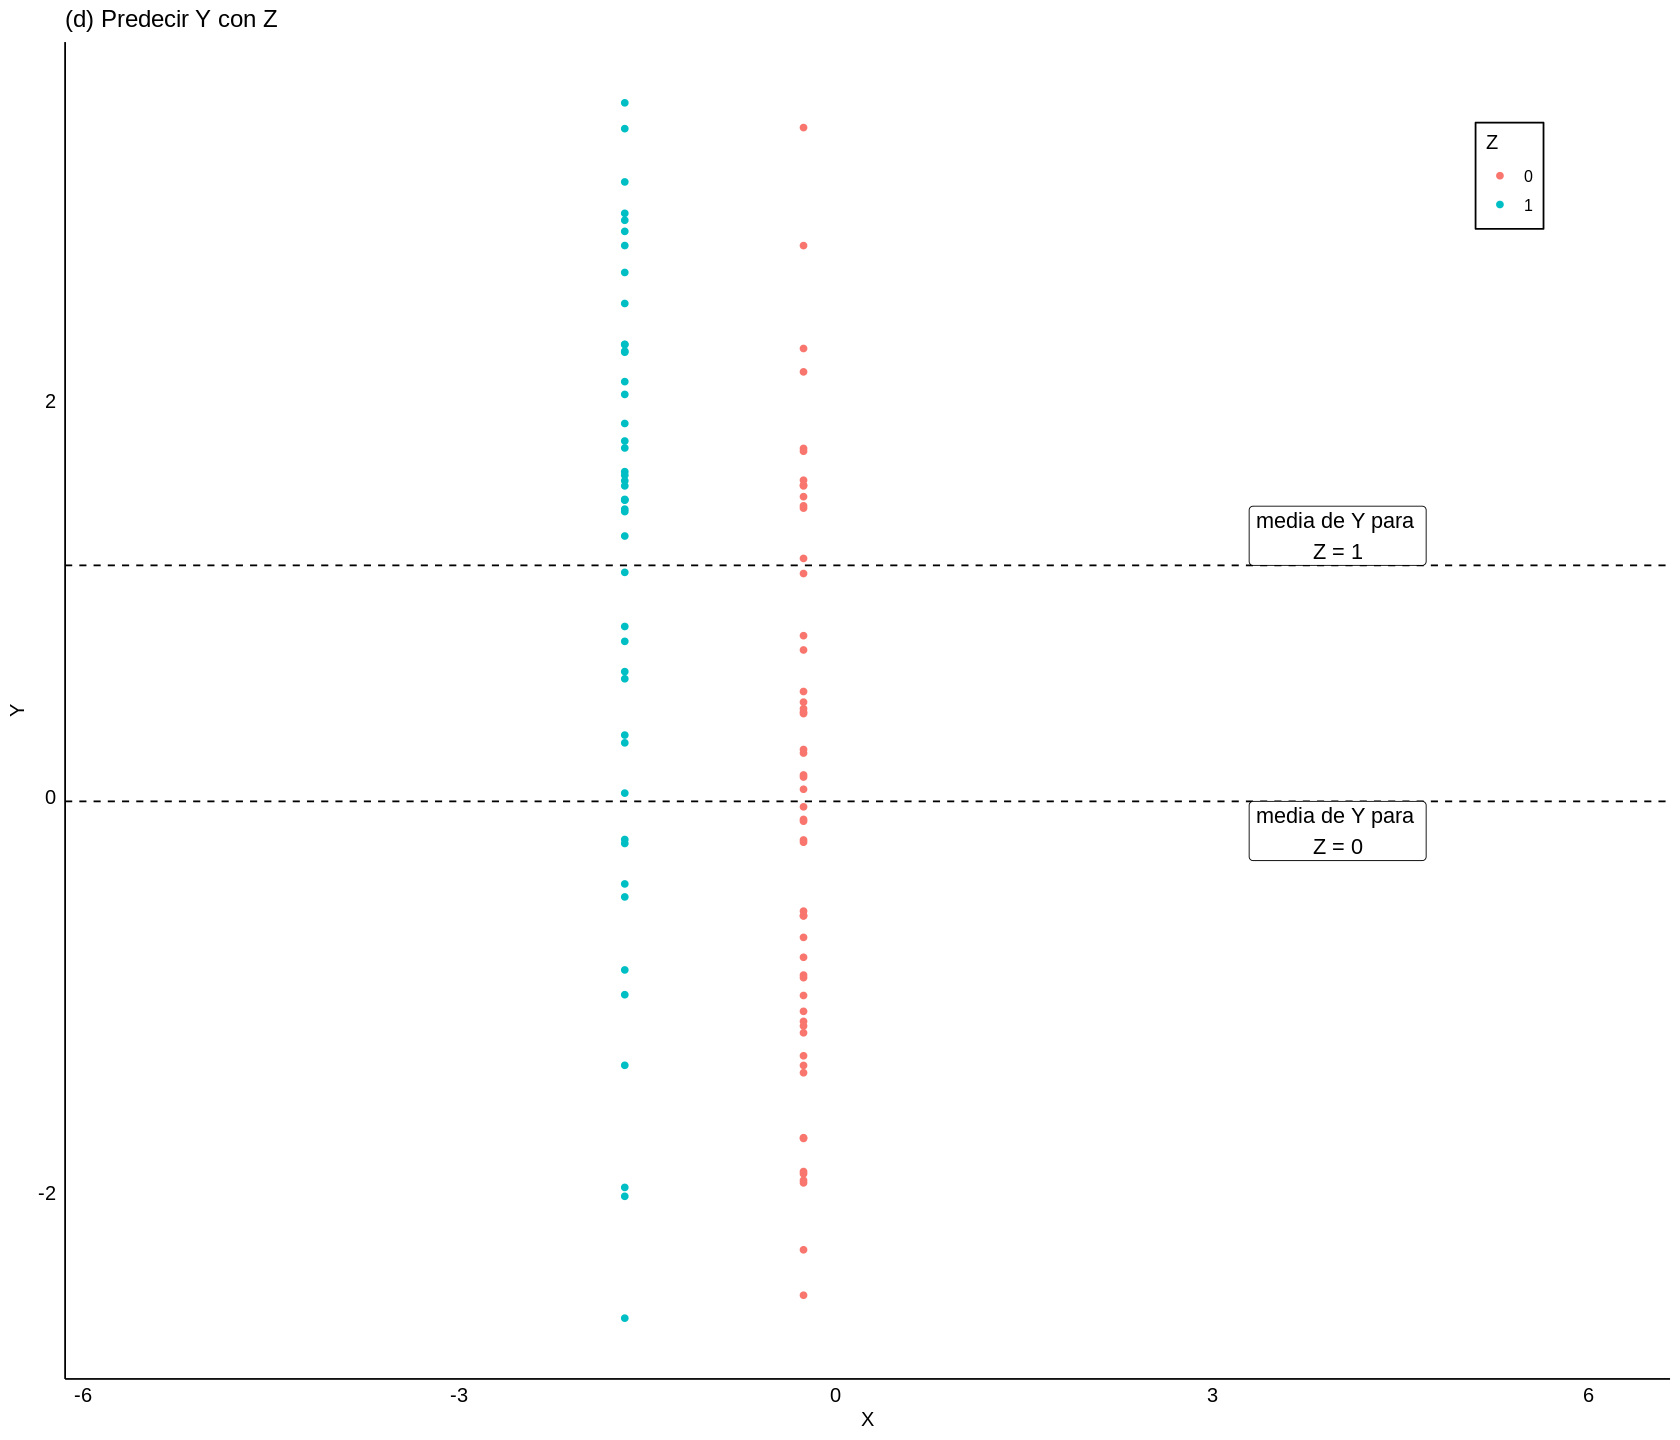

In [86]:
p4 <- ggplot(tb, aes(x = mean_X, y = Y, color= factor(Z))) +
  geom_point() +
  geom_hline(aes(yintercept = mns$Y[1]), linetype = 'dashed', color = 'black') +
  geom_hline(aes(yintercept = mns$Y[2]), linetype = 'dashed', color = 'black') +
  annotate(geom = 'label', y = mns$Y[1], x = 4, label = 'media de Y para \nZ = 0',
            size = 13/.pt, vjust = 1) +
  annotate(geom = 'label', y = mns$Y[2], x = 4, label = 'media de Y para \nZ = 1',
            size = 13/.pt, vjust = 0) +
  scale_shape_manual(values = c(1,19)) +
  scale_x_continuous(limits = c(min(tb$X),max(tb$X))) +
  guides(shape = FALSE) +
  labs(title = '(d) Predecir Y con Z', color = 'Z',
       x = 'X') +
  theme_pubr() +
  theme(
        axis.ticks = element_blank(),
        legend.position = c(.9,.9),
        legend.background = element_rect(size = .5, color = 'black'))
p4


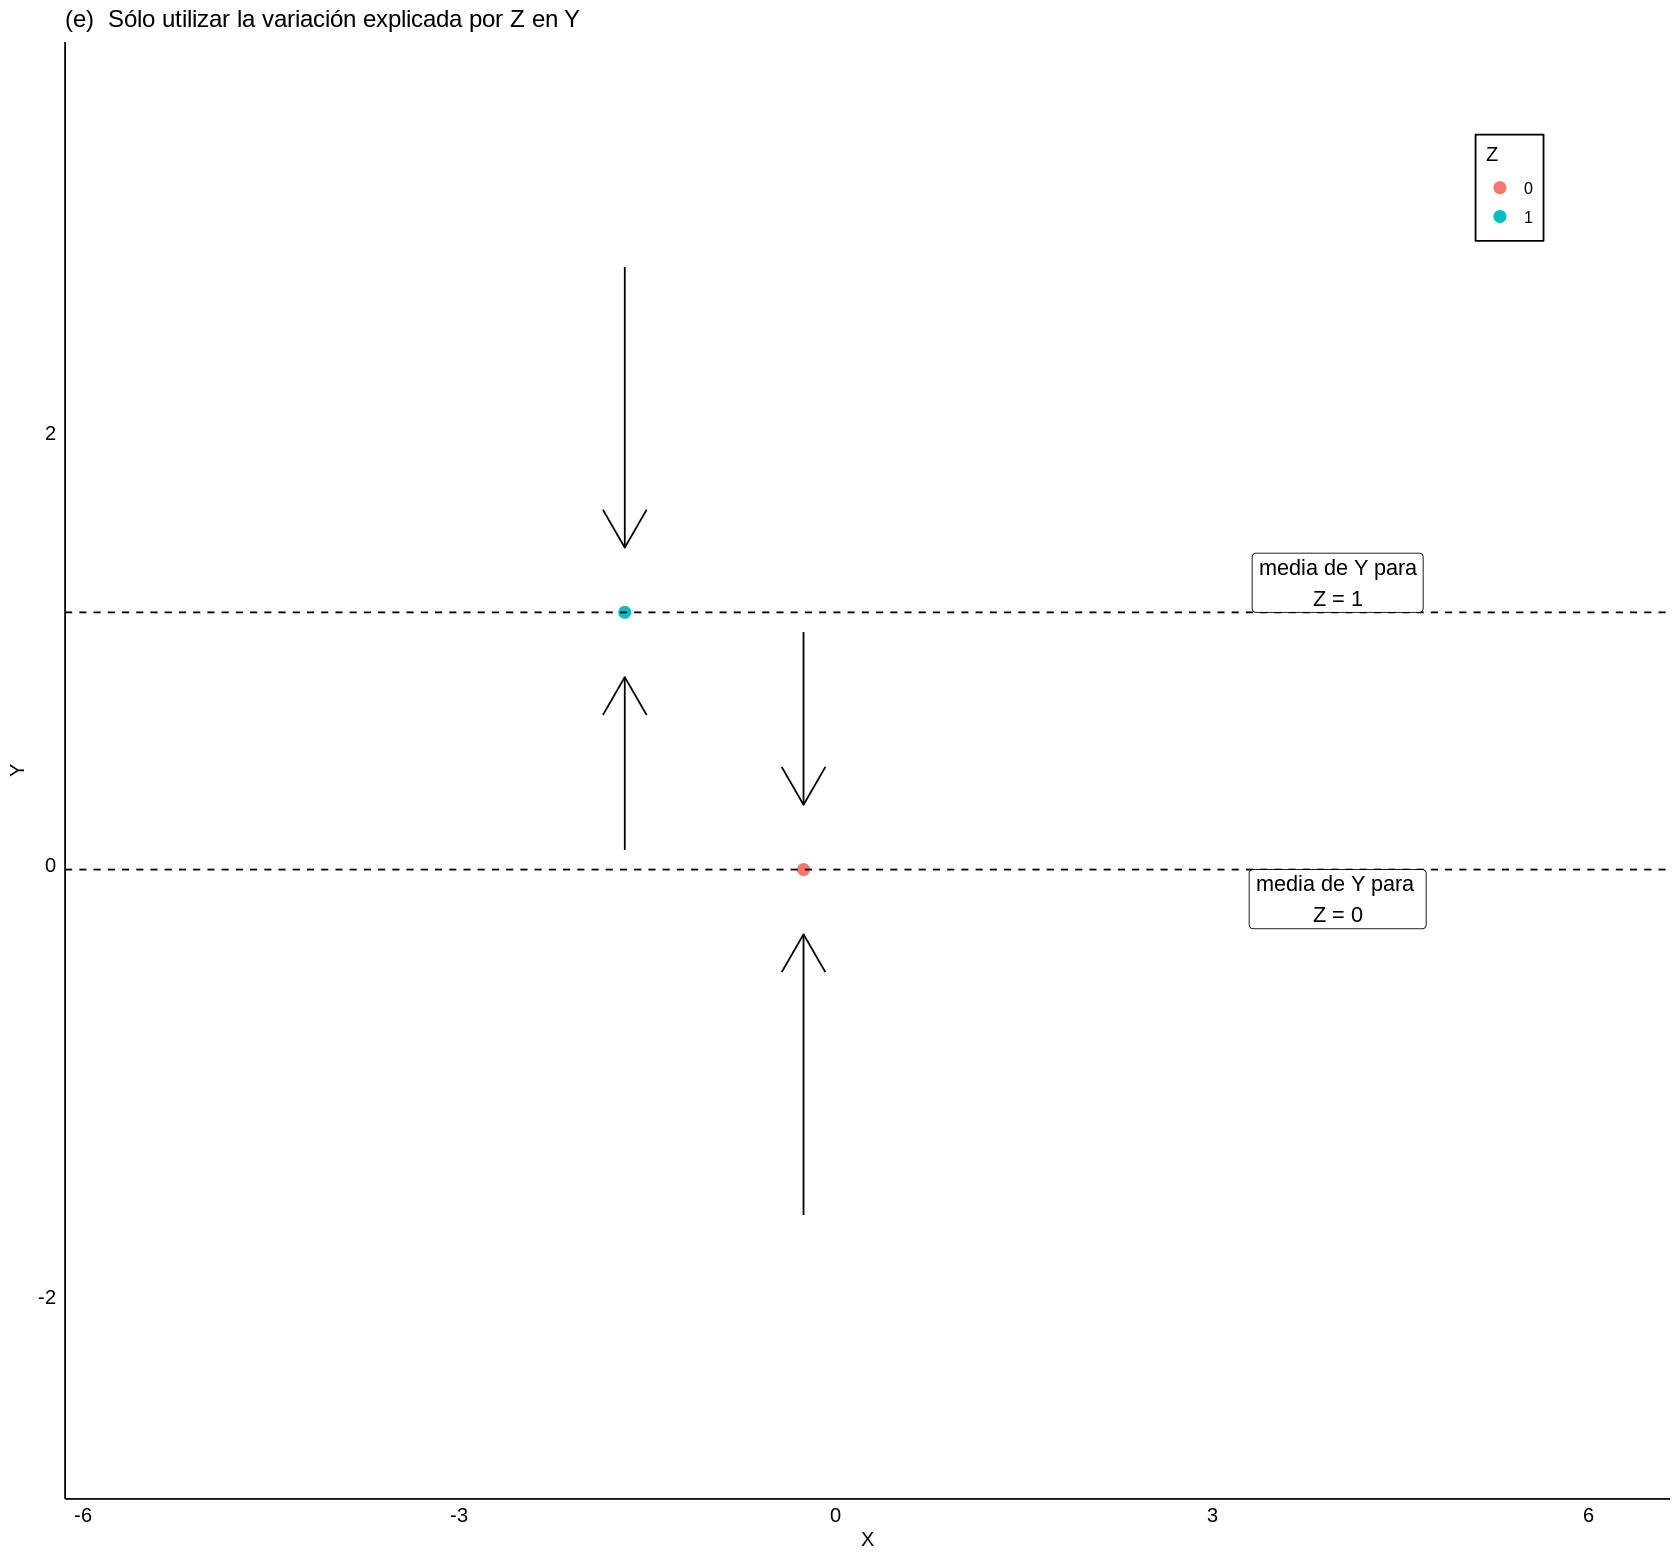

In [91]:
p5 <- ggplot(tb %>% group_by(Z) %>% slice(1), aes(x = mean_X, y = mean_Y, color = factor(Z))) +
  geom_point( size = 3) +
  geom_hline(aes(yintercept = mns$Y[1]), linetype = 'dashed', color = 'black') +
  geom_hline(aes(yintercept = mns$Y[2]), linetype = 'dashed', color = 'black') +
  annotate(geom = 'label', y = mns$Y[1], x = 4, label = 'media de Y para \nZ = 0',
            size = 13/.pt, vjust = 1) +
  annotate(geom = 'label', y = mns$Y[2], x = 4, label = 'media de Y para\nZ = 1',
           size = 13/.pt, vjust = 0) +
  annotate(geom = 'segment', x = mns$X[1], xend = mns$X[1], y = mns$Y[1] + 1.1, yend = mns$Y[1]+.3, arrow = arrow(length = unit(0.03, "npc"))) +
  annotate(geom = 'segment', x = mns$X[1], xend = mns$X[1], y = mns$Y[1] - 1.6, yend = mns$Y[1]-.3, arrow = arrow(length = unit(0.03, "npc"))) +
  annotate(geom = 'segment', x = mns$X[2], xend = mns$X[2], y = mns$Y[2] + 1.6, yend = mns$Y[2]+.3, arrow = arrow(length = unit(0.03, "npc"))) +
  annotate(geom = 'segment', x = mns$X[2], xend = mns$X[2], y = mns$Y[2] - 1.1, yend = mns$Y[2]-.3, arrow = arrow(length = unit(0.03, "npc"))) +
  scale_shape_manual(values = c(1,19)) +
  scale_x_continuous(limits = c(min(tb$X),max(tb$X))) +
  scale_y_continuous(limits = c(min(tb$Y),max(tb$Y))) +
  guides(shape = FALSE) +
  labs(title = '(e)  Sólo utilizar la variación explicada por Z en Y  ',  color = 'Z',
       x = 'X',
       y = 'Y') +
  theme_pubr() +
  theme(
        axis.ticks = element_blank(),
        legend.position = c(.9,.9),
        legend.background = element_rect(size = .5, color = 'black'))
p5


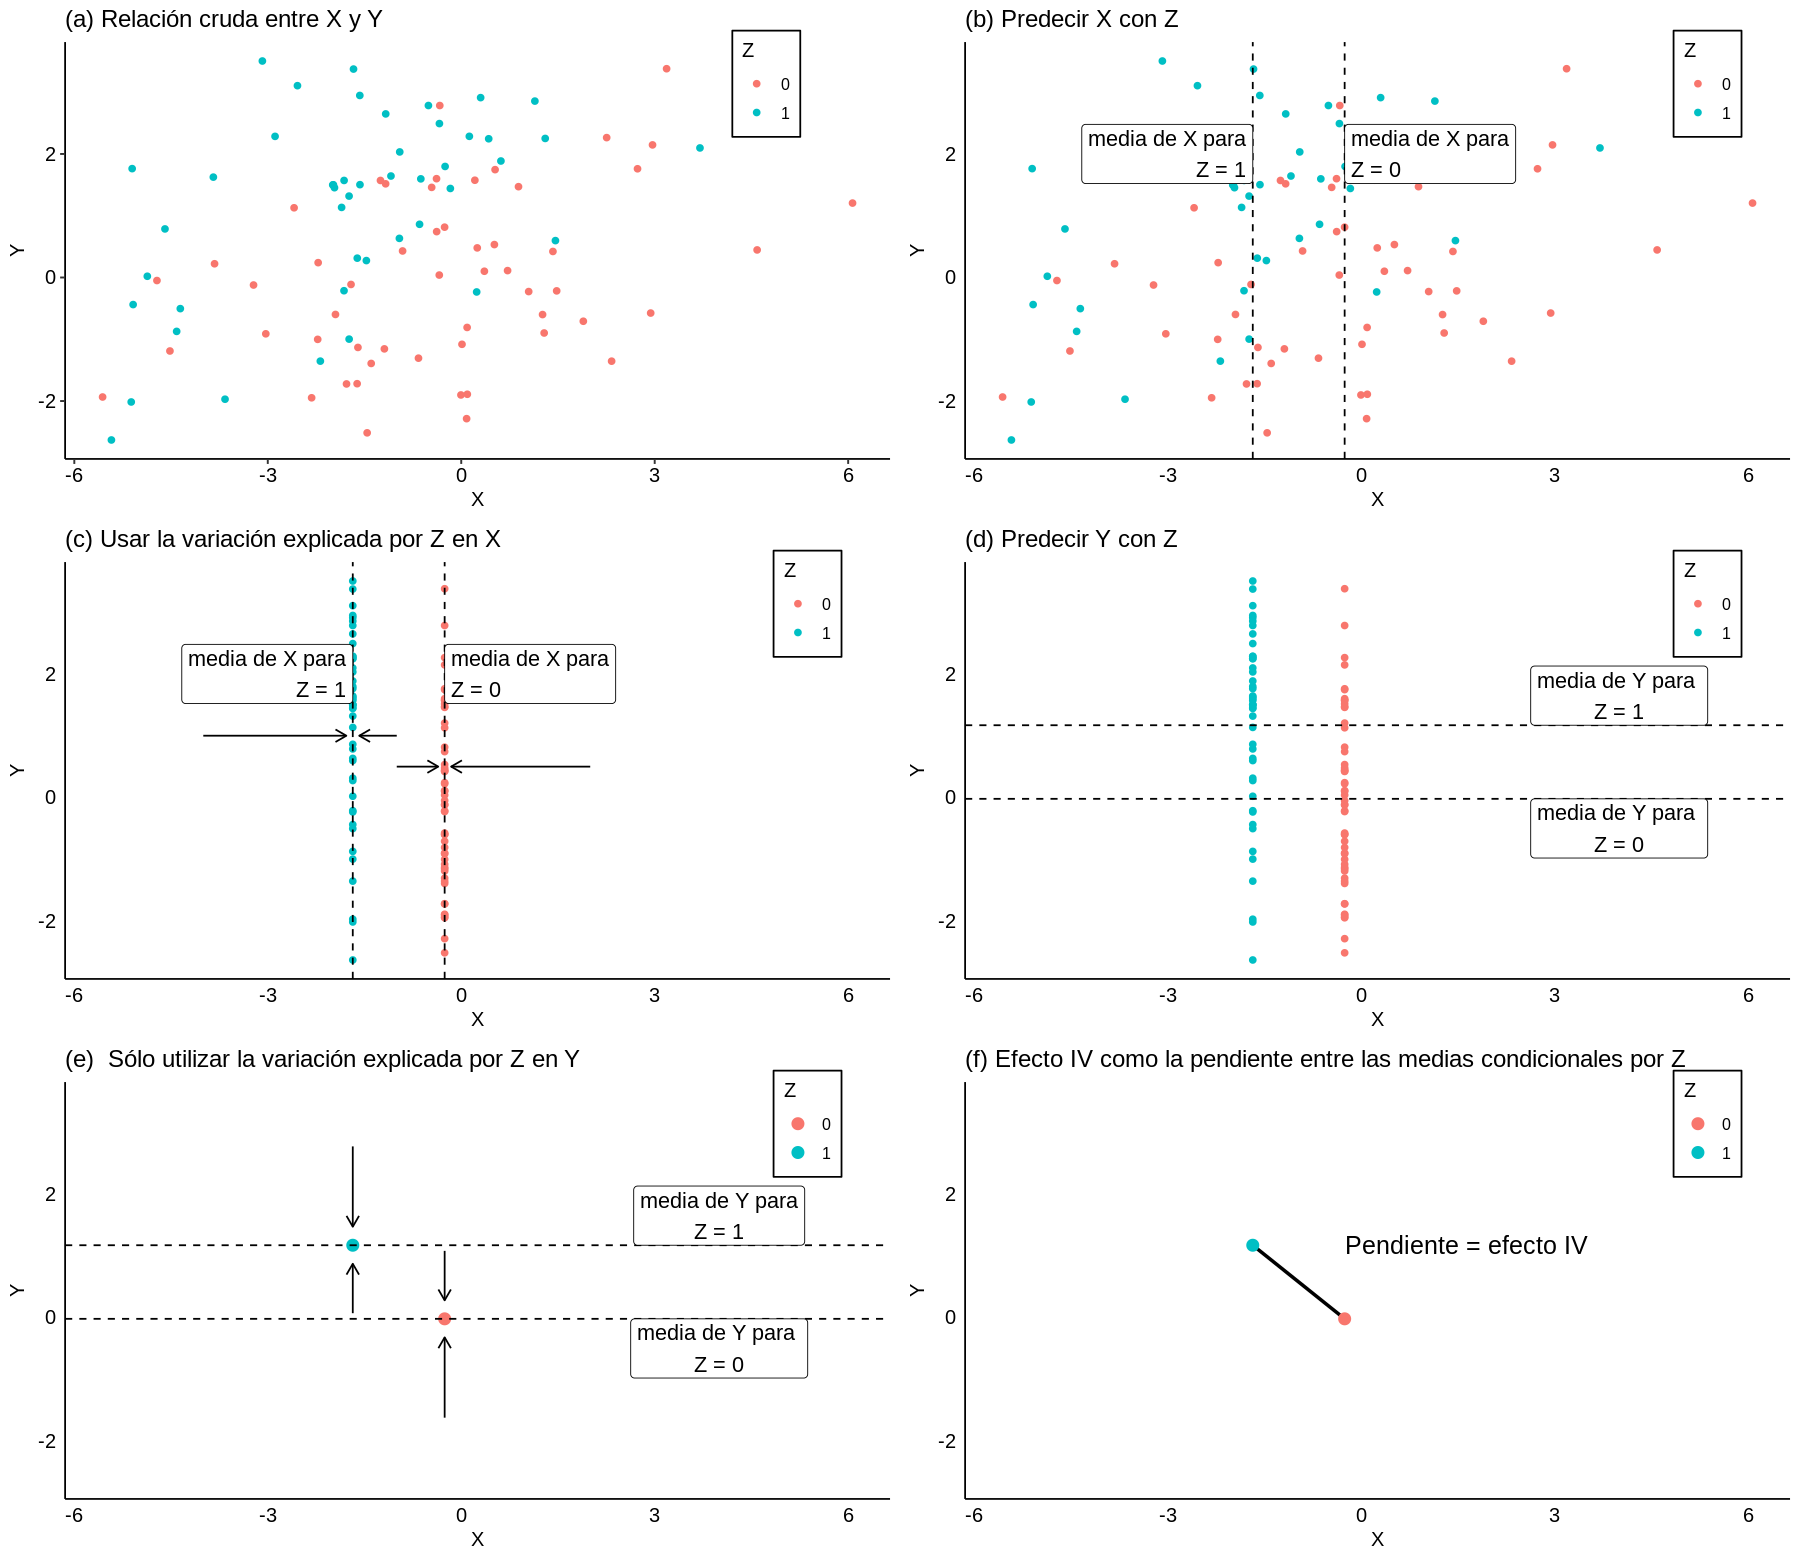

In [95]:
p6 <- ggplot(tb %>% group_by(Z) %>% slice(1), aes(x = mean_X, y = mean_Y)) +
  geom_line(size = 1) +
  geom_point(aes(color = factor(Z)),  size = 3) +
  annotate(geom = 'text', x = mns$X[1], y = mns$Y[2], label = 'Pendiente = efecto IV',
            size = 15/.pt, hjust = 0) +
  scale_shape_manual(values = c(1,19)) +
  scale_x_continuous(limits = c(min(tb$X),max(tb$X))) +
  scale_y_continuous(limits = c(min(tb$Y),max(tb$Y))) +
  guides(shape = FALSE) +
  labs(title = '(f) Efecto IV como la pendiente entre las medias condicionales por Z',   color = 'Z',
       x = 'X',
       y = 'Y') +
  theme_pubr() +
  theme(
        axis.ticks = element_blank(),
        legend.position = c(.9,.9),
        legend.background = element_rect(size = .5, color = 'black'))
#Incrementar tamaño del plot

options(repr.plot.width = 15, repr.plot.height = 13)


plot_grid(p1, p2, p3, p4, p5, p6, ncol = 2)

